In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/Shane/Downloads/PortfolioProjects/Retention_Cohort_&_LTV/Retention_Cohort_Data.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Formatted_Month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y%m')
df['Formatted_Month'].head()

0    201012
1    201012
2    201012
3    201012
4    201012
Name: Formatted_Month, dtype: object

In [7]:
df['Total'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Formatted_Month,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,201012,20.34


In [8]:
customer_puchase_by_month = df.groupby(['CustomerID', 'Formatted_Month']).agg({'Total':'sum'}).reset_index()
customer_puchase_by_month

,CustomerID,Formatted_Month,Total
0,12346.0,201101,0.00
1,12347.0,201012,711.79
2,12347.0,201101,475.39
3,12347.0,201104,636.25
4,12347.0,201106,382.52
...,...,...,...
13670,18283.0,201110,114.65
13671,18283.0,201111,651.56
13672,18283.0,201112,208.00
13673,18287.0,201105,765.28


In [9]:
df_retention = pd.crosstab(customer_puchase_by_month['CustomerID'], customer_puchase_by_month['Formatted_Month']).reset_index()
df_retention

Formatted_Month,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
4368,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
4369,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1
4370,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1


In [10]:
# create the retention table
months = df_retention.columns[1:]
retention = []

for i in range (len(months)-1):
    retention_data = {}
    month = months[i+1]
    prev_month = months[i]
    retention_data['Month'] = int(month)
    retention_data['TotalCount'] = df_retention[month].sum()
    retention_data['RetainedCount'] = df_retention[(df_retention[month]>0) & (df_retention[prev_month]>0)][month].sum()
    retention.append(retention_data)

df_retention_pd = pd.DataFrame(retention)
df_retention_pd['RetentionRate'] = df_retention_pd['RetainedCount']/df_retention_pd['TotalCount']
df_retention_pd

,Month,TotalCount,RetainedCount,RetentionRate
0,201101,783,362,0.462324
1,201102,798,299,0.374687
2,201103,1020,345,0.338235
3,201104,899,346,0.384872
4,201105,1079,399,0.369787
5,201106,1051,464,0.441484
6,201107,993,415,0.417925
7,201108,980,433,0.441837
8,201109,1302,465,0.357143
9,201110,1425,552,0.387368


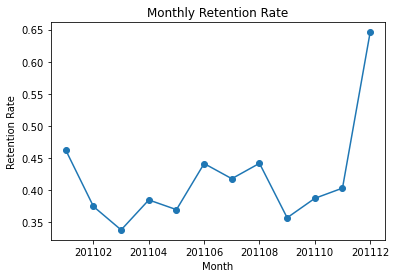

In [11]:
plt.plot(df_retention_pd['Month'], df_retention_pd['RetentionRate'], marker='o')
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.title("Monthly Retention Rate")
plt.ticklabel_format(useOffset=False)
plt.show()

In [12]:
# add the column of first order month
df_retention = pd.crosstab(customer_puchase_by_month['CustomerID'], customer_puchase_by_month['Formatted_Month']).reset_index()
first_order_month = df.groupby('CustomerID').agg({'Formatted_Month':'min'}).reset_index()
df_retention_min = pd.merge(df_retention, first_order_month,on='CustomerID')
df_retention_min.rename(columns = {'Formatted_Month':'first_order_month'}, inplace=True)
df_retention_min

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,first_order_month
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1,201012
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0,201012
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0,201111
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0,201102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
4368,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
4369,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
4370,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [13]:
#create the retention table by months
retention_array = []
for i in range(len(months)):
    retention_data = {}
    past_months = months[:i]
    selected_month = months[i]
    following_months = months[i+1:]

    total_customers = df_retention_min[df_retention_min['first_order_month'] == f'{selected_month}']['first_order_month'].count()
    retention_data['Total_customers'] = total_customers
    retention_data[selected_month] = 1

    for past_month in past_months:
        retention_data[prev_month] = np.nan

    for following_month in following_months:
        retention_data[following_month] = np.round(df_retention_min[(df_retention_min['first_order_month'] == f'{selected_month}')][f'{following_month}'].sum()/total_customers,2)
    retention_array.append(retention_data)

df_retention_min_pd = pd.DataFrame(retention_array)
df_retention_min_pd.index = months
df_retention_min_pd

,Total_customers,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
Formatted_Month,,,,,,,,,,,,,,
201012,948,1.0,0.38,0.33,0.39,0.36,0.40,0.38,0.35,0.35,0.39,0.37,0.50,0.27
201101,421,NaN,1.00,0.24,0.28,0.24,0.33,0.30,0.26,0.26,0.31,0.35,0.37,0.15
201102,380,NaN,NaN,1.00,0.25,0.19,0.28,0.27,0.25,0.26,0.28,0.26,0.31,0.09
201103,440,NaN,NaN,NaN,1.00,0.19,0.25,0.22,0.23,0.18,0.26,0.24,0.29,0.09
201104,299,NaN,NaN,NaN,NaN,1.00,0.23,0.22,0.21,0.21,0.24,0.23,0.26,0.08
201105,279,NaN,NaN,NaN,NaN,NaN,1.00,0.24,0.17,0.17,0.22,0.24,0.27,0.10
201106,235,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.19,0.27,0.25,0.34,0.10
201107,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.20,0.23,0.27,0.12
201108,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.25,0.25,0.25,0.14
